 # **Loan Eligibility Prediction System** 

# **Problem**
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('dark')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# **Data collection and processing**

In [2]:
df=pd.read_csv('loan-train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Number of Rows and Columns
print("Shape :", df.shape)

Shape : (614, 13)


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df_columns = df.columns
print(df_columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


# **Exploratory Data Analysis**

In [9]:
#To know, How many values available in object('categorical') type of features And Return Categorical values with Count.
def explore_object_type(df ,feature_name):
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [10]:
for featureName in df.columns:
    if df[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(df, str(featureName))


"Loan_ID's" Values with count are :
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

"Gender's" Values with count are :
Gender
Male      489
Female    112
Name: count, dtype: int64

"Married's" Values with count are :
Married
Yes    398
No     213
Name: count, dtype: int64

"Dependents's" Values with count are :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

"Education's" Values with count are :
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

"Self_Employed's" Values with count are :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

"Property_Area's" Values with count are :
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

"Loan_Status's" Values with count are :
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [11]:
# Number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
# Replacing the value of 3+ to 4
df=df.replace(to_replace='3+',value='4')
df['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
4     51
Name: count, dtype: int64

# **Imputation of null values**

In [14]:
# Filling mode for categorical columns
for col in ['Credit_History', 'Gender', 'Dependents', 'Self_Employed', 'Married']:
    df[col].fillna(df[col].mode()[0], inplace=True)  # mode()[0] gets the most frequent value

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Check remaining missing values
df.isnull().sum()

C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\2579633154.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # mode()[0] gets the most frequent value
C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\2579633154.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# Convert discrete/binary features to int
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)

# **Encoding categorical variables**

In [16]:
df.Loan_Status = df.Loan_Status.replace({"Y": 1, "N" : 0})
df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})
df.Married = df.Married.replace({"Yes": 1, "No" : 0})
df.Self_Employed = df.Self_Employed.replace({"Yes": 1, "No" : 0})

C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\3682841309.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Loan_Status = df.Loan_Status.replace({"Y": 1, "N" : 0})
C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\3682841309.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})
C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\3682841309.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behav

In [17]:
# Ordinal encoding
df.replace( {
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Education': {'Not Graduate': 0, 'Graduate': 1},
    'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 4}
}, inplace=True)

C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\743287979.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace( {


In [18]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360,1,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.000000,180,1,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360,1,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360,1,2,1


# **Finally, We have all the features with numerical values**

# **Data Visualizations**

<Axes: xlabel='Education', ylabel='count'>

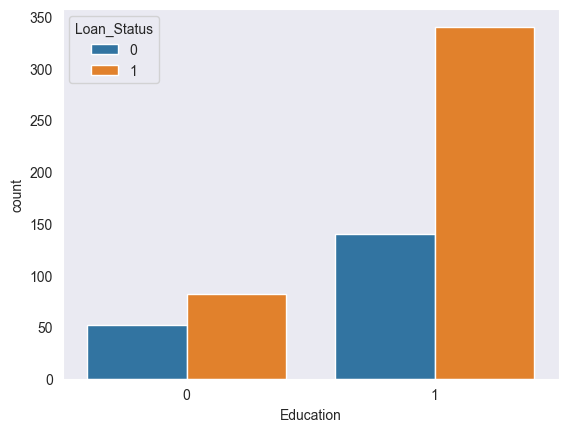

In [19]:
# Education vs Loan_status
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Married', ylabel='count'>

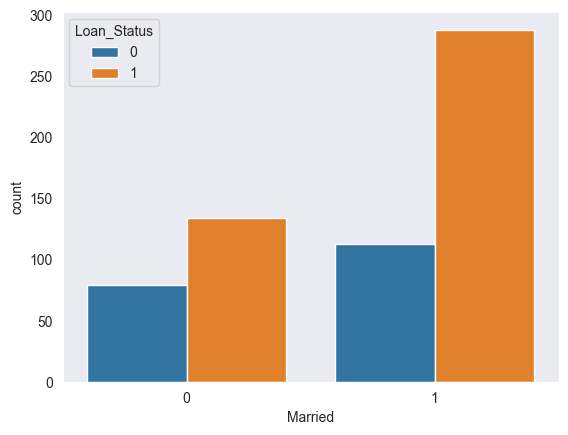

In [20]:
# Married vs Loan_status
sns.countplot(x='Married', hue='Loan_Status', data=df)

C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\2411153800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='Set2')


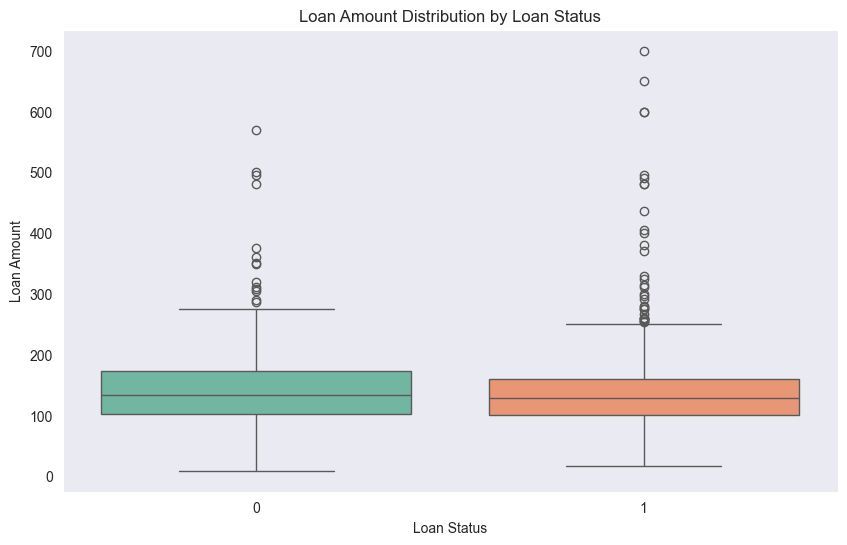

In [21]:
# LoanAmount vs Loan_status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='Set2')
plt.title("Loan Amount Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

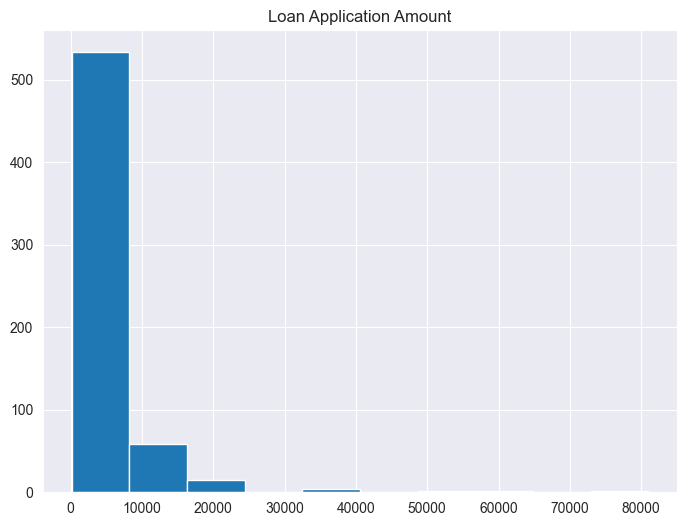

In [22]:
plt.figure(figsize=(18,6))

# Subplot for Applicant Income
plt.subplot(1, 2, 1)
df['ApplicantIncome'].hist(bins=10)  # Plot histogram with 10 bins
plt.title("Loan Application Amount")
plt.show()

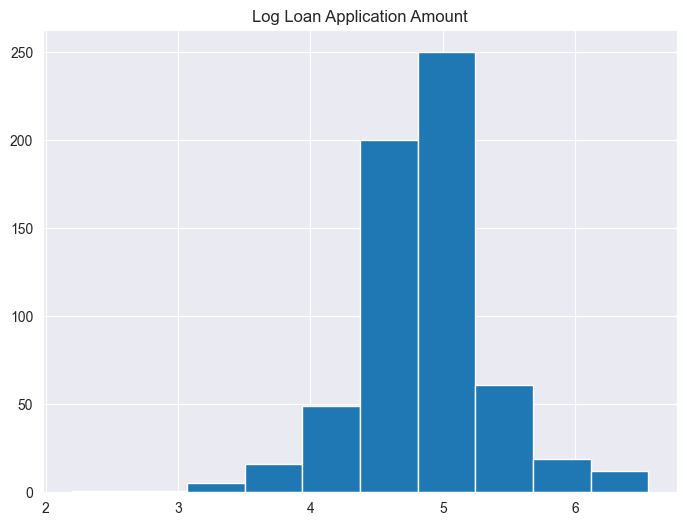

In [23]:
# Applying a logarithmic transformation (np.log()) reduces the impact of extreme values,handle Skewness and helps normalize the data for analysis or modeling.
plt.figure(figsize=(18, 6))

# Subplot for Log-transformed Loan Amount
plt.subplot(1, 2, 1)
plt.grid()
plt.hist(np.log(df['LoanAmount']), bins=10)  # Log transform LoanAmount
plt.title("Log Loan Application Amount")
plt.show()

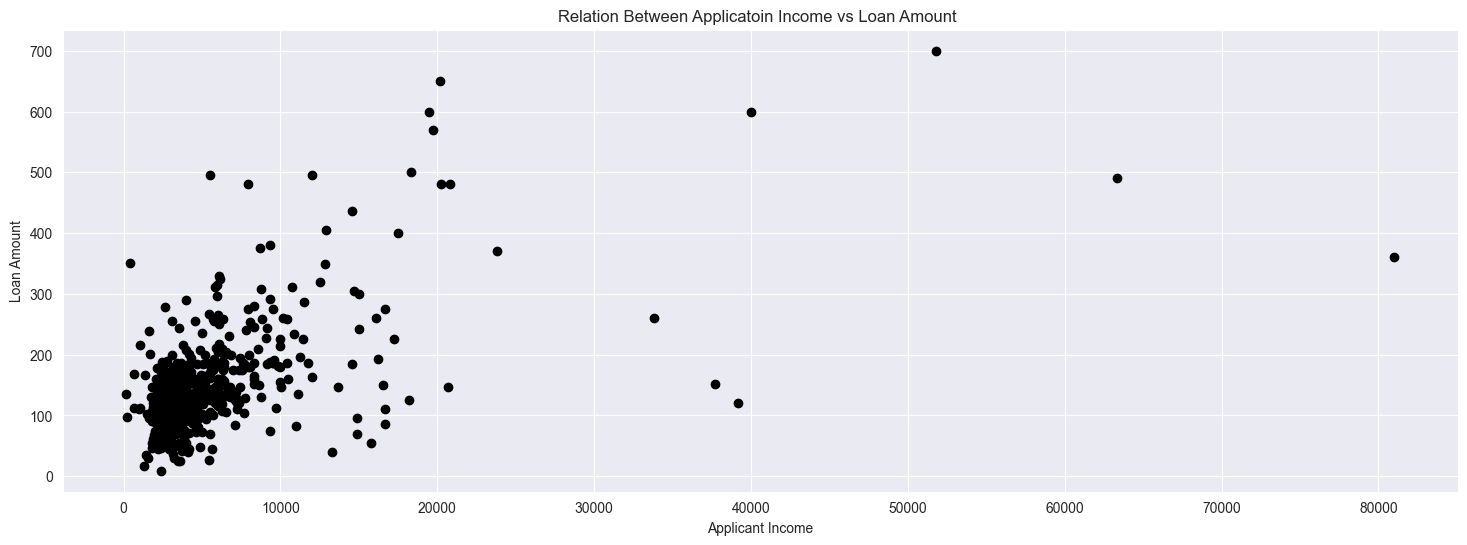

In [24]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(df['ApplicantIncome'] , df['LoanAmount'], c='k', marker='o')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

# **Define Target Variable (y) and Feature Variables (X)**

In [26]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

# **Train Test Split**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Choose ML Model-1 (LogisticRegression).

In [28]:
from sklearn.linear_model import LogisticRegression
# Training the model
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

C:\Users\ksubh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **Model Evaluation**

Train Accuracy: 0.80
Test Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



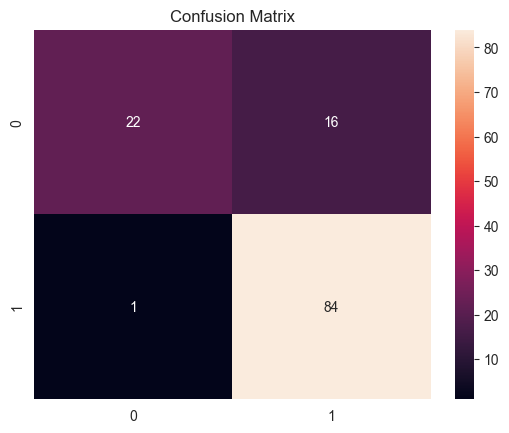

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
# Predictions
y_train_pred = logistic_model.predict(X_train)
y_pred = logistic_model.predict(X_test)

# Accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# **Feature importance plot**

C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\291386516.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


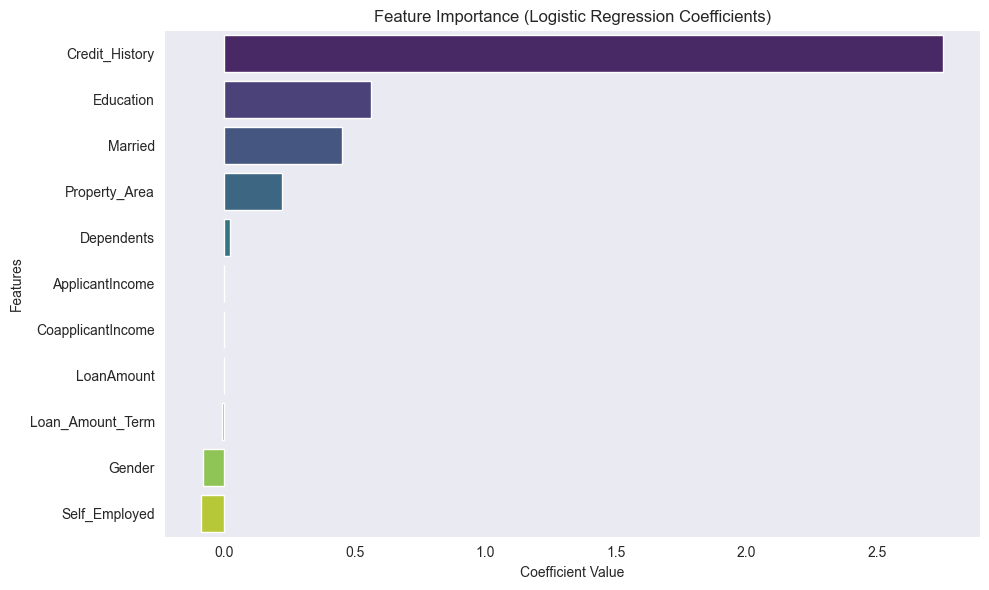

In [30]:
# Extracting feature names
feature_names = X.columns

# Coefficients from the logistic model
coefficients = logistic_model.coef_[0]

# Creating a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()# Feature importance plot


# **Choose ML Model-2 (SVM).**

In [31]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a larger subset of data for tuning
X_train_small, _, y_train_small, _ = train_test_split(X_train_scaled, y_train, train_size=0.5, random_state=42)

# Expanded parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']
}

# Stratified RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_grid,
    n_iter=20,  # Increased iterations for better exploration
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Train with RandomizedSearchCV
random_search.fit(X_train_small, y_train_small)

# Best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'kernel': 'linear', 'gamma': 0.001, 'C': 0.01}
Best Score: 0.7673469387755102


# **Model Evaluation**

Train Accuracy: 0.80
Test Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



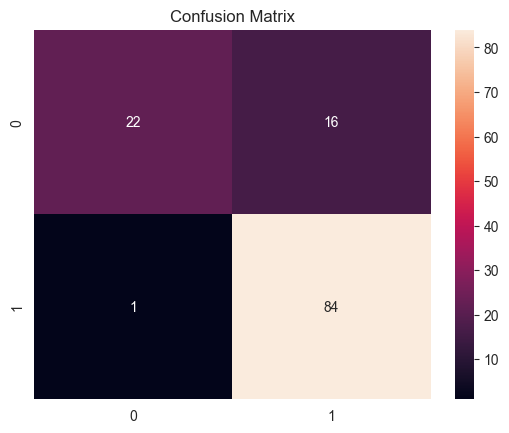

In [32]:
# Evaluate on full training and test sets
train_accuracy = accuracy_score(y_train, best_model.predict(X_train_scaled))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_scaled))

print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# **Feature importance plot**

C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\1402232153.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


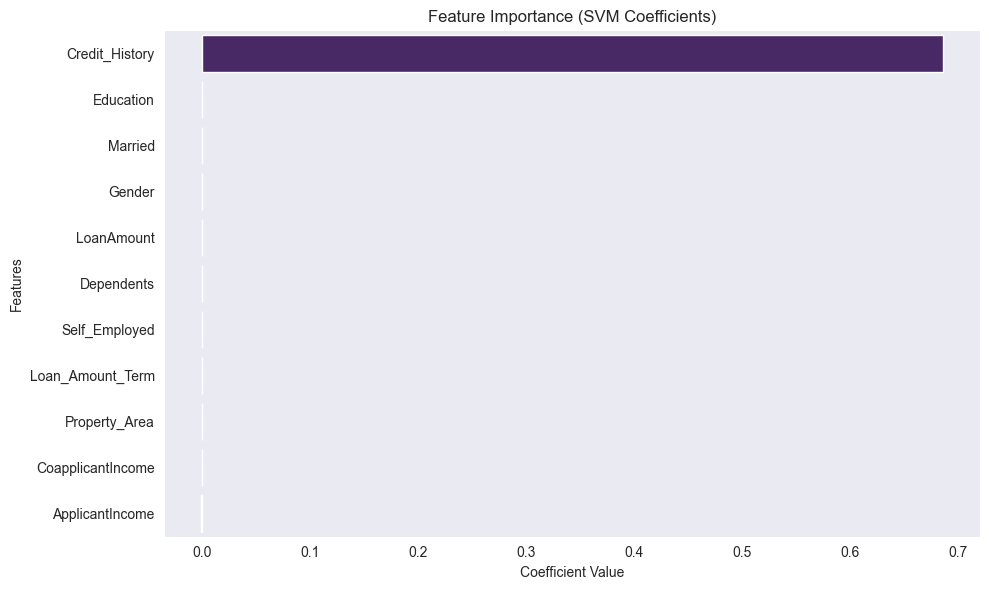

In [33]:
# Ensure the best model uses a linear kernel
if best_params['kernel'] == 'linear':
    # Extract coefficients
    coefficients = best_model.coef_[0]  # Coefficients of the linear SVM
    feature_names = X.columns  # Feature names from the original data

    # Create a DataFrame for feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance (SVM Coefficients)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance visualization is only supported for linear kernels.")

# **Choose ML Model-3 Boosting (SVMs) as the base model**

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Base model: SVM with the best parameters
base_svm = SVC(kernel='linear', gamma=0.001, C=0.01, probability=True, random_state=42)

# Bagging with SVM as the base estimator
bagging_svm = BaggingClassifier(
    estimator=base_svm,  # Corrected argument name
    n_estimators=10,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Train the Bagging Classifier
bagging_svm.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(C=0.01, gamma=0.001, kernel='linear',
                                probability=True, random_state=42),
                  n_jobs=-1, random_state=42)

# **Model Evaluation**

Accuracy: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        38
           1       0.82      0.98      0.89        85

    accuracy                           0.84       123
   macro avg       0.87      0.75      0.78       123
weighted avg       0.85      0.84      0.82       123



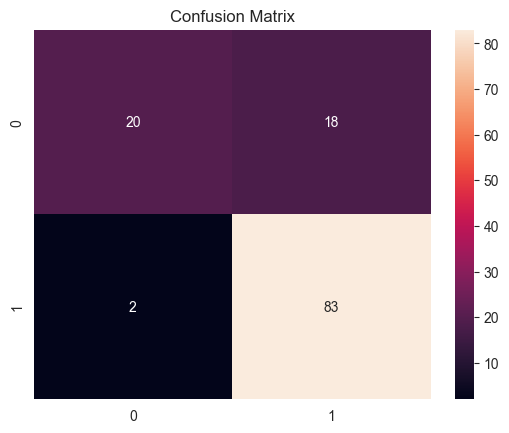

In [35]:
# Make predictions
y_pred = bagging_svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# **Feature importance plot**

C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\776812650.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


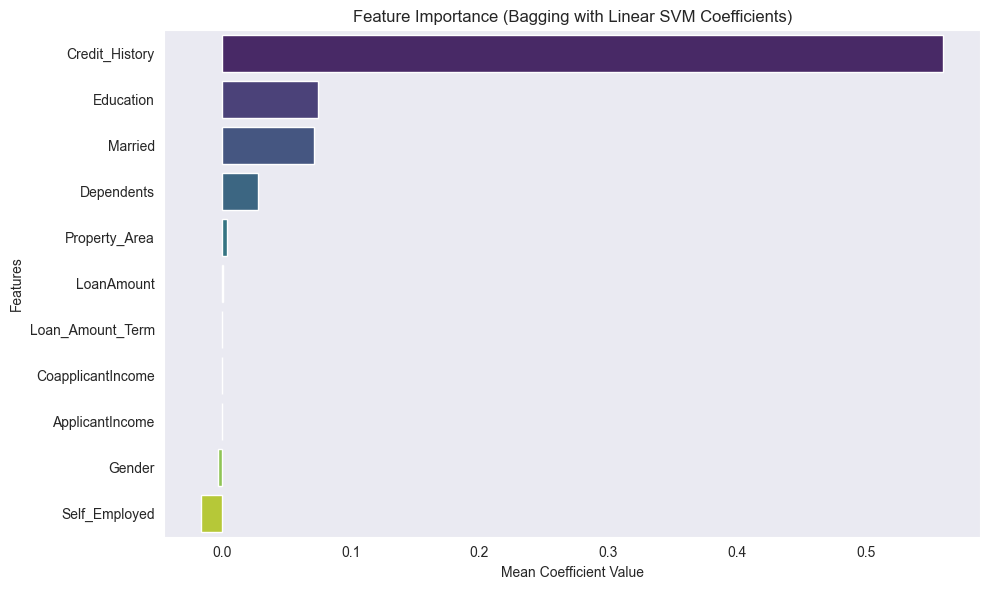

In [36]:

# Ensure the base estimator uses a linear kernel
if isinstance(base_svm, SVC) and base_svm.kernel == 'linear':
    # Extract coefficients from each SVM in the ensemble
    all_coefficients = []
    for estimator in bagging_svm.estimators_:
        # Coefficients from each individual SVM
        all_coefficients.append(estimator.coef_[0])  # Extract coefficients for linear kernel

    # Average the coefficients across all SVMs in the ensemble
    mean_coefficients = np.mean(all_coefficients, axis=0)
    
    # Create a DataFrame for feature importance
    feature_names = X.columns
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': mean_coefficients
    }).sort_values(by='Coefficient', ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance (Bagging with Linear SVM Coefficients)')
    plt.xlabel('Mean Coefficient Value')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance is only supported for BaggingClassifier with linear SVM base estimators.")

# **Choose ML Model-4 RandomForestClassifier**

In [37]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Define Random Forest parameters for tuning
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Base Random Forest model
base_rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(base_rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_rf = grid_search.best_estimator_
print(f"Best Random Forest Parameters: {grid_search.best_params_}")

# Bagging with the tuned Random Forest as the base estimator
bagging_rf = BaggingClassifier(
    estimator=best_rf,
    n_estimators=10,  # Number of bagging estimators
    random_state=42,
    n_jobs=-1
)

# Train the Bagging Classifier
bagging_rf.fit(X_train, y_train)


Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


BaggingClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                   min_samples_leaf=2,
                                                   min_samples_split=10,
                                                   n_estimators=150,
                                                   random_state=42),
                  n_jobs=-1, random_state=42)

# **Model Evaluation**

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



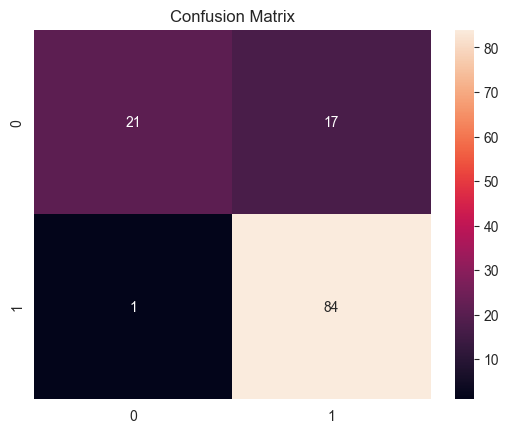

In [38]:
# Make predictions
y_pred = bagging_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# **Feature importance plot**

Top 10 Important Features:
              Feature  Importance
9      Credit_History    0.410867
5     ApplicantIncome    0.165093
7          LoanAmount    0.143735
6   CoapplicantIncome    0.097963
10      Property_Area    0.042286
8    Loan_Amount_Term    0.036492
2          Dependents    0.035727
3           Education    0.022351
1             Married    0.020868
4       Self_Employed    0.012618


C:\Users\ksubh\AppData\Local\Temp\ipykernel_26516\2841477596.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


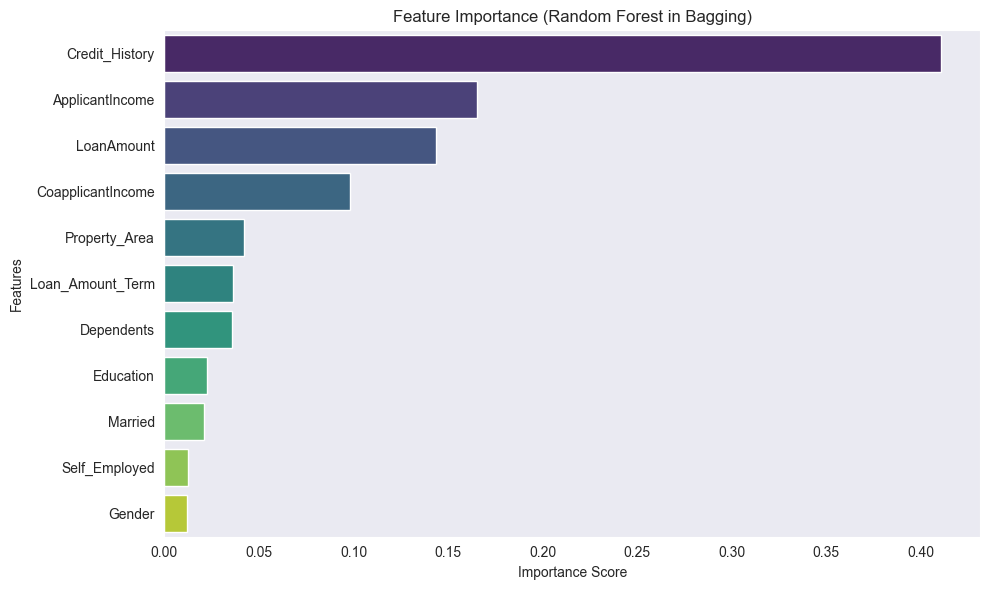

In [39]:
# Extract feature importance from the best Random Forest model
feature_importances = best_rf.feature_importances_

# Create a DataFrame for visualization
feature_names = X.columns  # Ensure feature names match the columns of your dataset
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print the top 10 most important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest in Bagging)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
